# Boom Bikes: Understanding demands of bikes

### Problem statement : We are requireed to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expecttions. Further, the model will be a good way for managemet to understand the demand dynamics of a new market

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading the csv file

In [4]:
data = pd.read_csv('day.csv')
data

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

### Checking the shape of the dataset

In [5]:
data.shape

(730, 16)

#### - 730 Rows and 16 Columns

### Data Understanding

#### First observation of data

In [6]:
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [7]:
data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Dropping the unneccesary variables

##### - we dropped 'weekday' and 'holiday' because in the 'workingday' variable it is covered.
##### - we dropped 'season' because in the 'weathersit' it covers the weather status and the season.
##### - we don't have importance of and have variables who have better importance than 'dteday' and we dropped it.
##### - we dropped 'instant' it is a index column and does not have any prediction value.
##### - we dropped 'yr' and 'mnth' because it won't help in our prediction. 
##### - we dropped 'temp' because people go for cycling depending on the 'atemp' they feel.
##### - we dropped 'hum' and 'windspeed' becasue the data reflected is in the 'weathersit' and we have kept it.

#### The decision of dropping the variables was made by looking at the nature of variables and their 

In [8]:
new_data = data.drop(['instant','dteday','season','yr','mnth','holiday','weekday','temp','hum','windspeed'], axis = 1)

In [9]:
new_data.head(10)

workingday  weathersit     atemp  casual  registered   cnt
0           0           2  18.18125     331         654   985
1           0           2  17.68695     131         670   801
2           1           1   9.47025     120        1229  1349
3           1           1  10.60610     108        1454  1562
4           1           1  11.46350      82        1518  1600
5           1           1  11.66045      88        1518  1606
6           1           2  10.44195     148        1362  1510
7           0           2   8.11270      68         891   959
8           0           1   5.80875      54         768   822
9           1           1   7.54440      41        1280  1321

In [10]:
new_data.describe()

workingday  weathersit       atemp       casual   registered  \
count  730.000000  730.000000  730.000000   730.000000   730.000000   
mean     0.683562    1.394521   23.726322   849.249315  3658.757534   
std      0.465405    0.544807    8.150308   686.479875  1559.758728   
min      0.000000    1.000000    3.953480     2.000000    20.000000   
25%      0.000000    1.000000   16.889713   316.250000  2502.250000   
50%      1.000000    1.000000   24.368225   717.000000  3664.500000   
75%      1.000000    2.000000   30.445775  1096.500000  4783.250000   
max      1.000000    3.000000   42.044800  3410.000000  6946.000000   

               cnt  
count   730.000000  
mean   4508.006849  
std    1936.011647  
min      22.000000  
25%    3169.750000  
50%    4548.500000  
75%    5966.000000  
max    8714.000000

#### Checking the relations between the variables that we have after we have dropped some variables in a pairplot

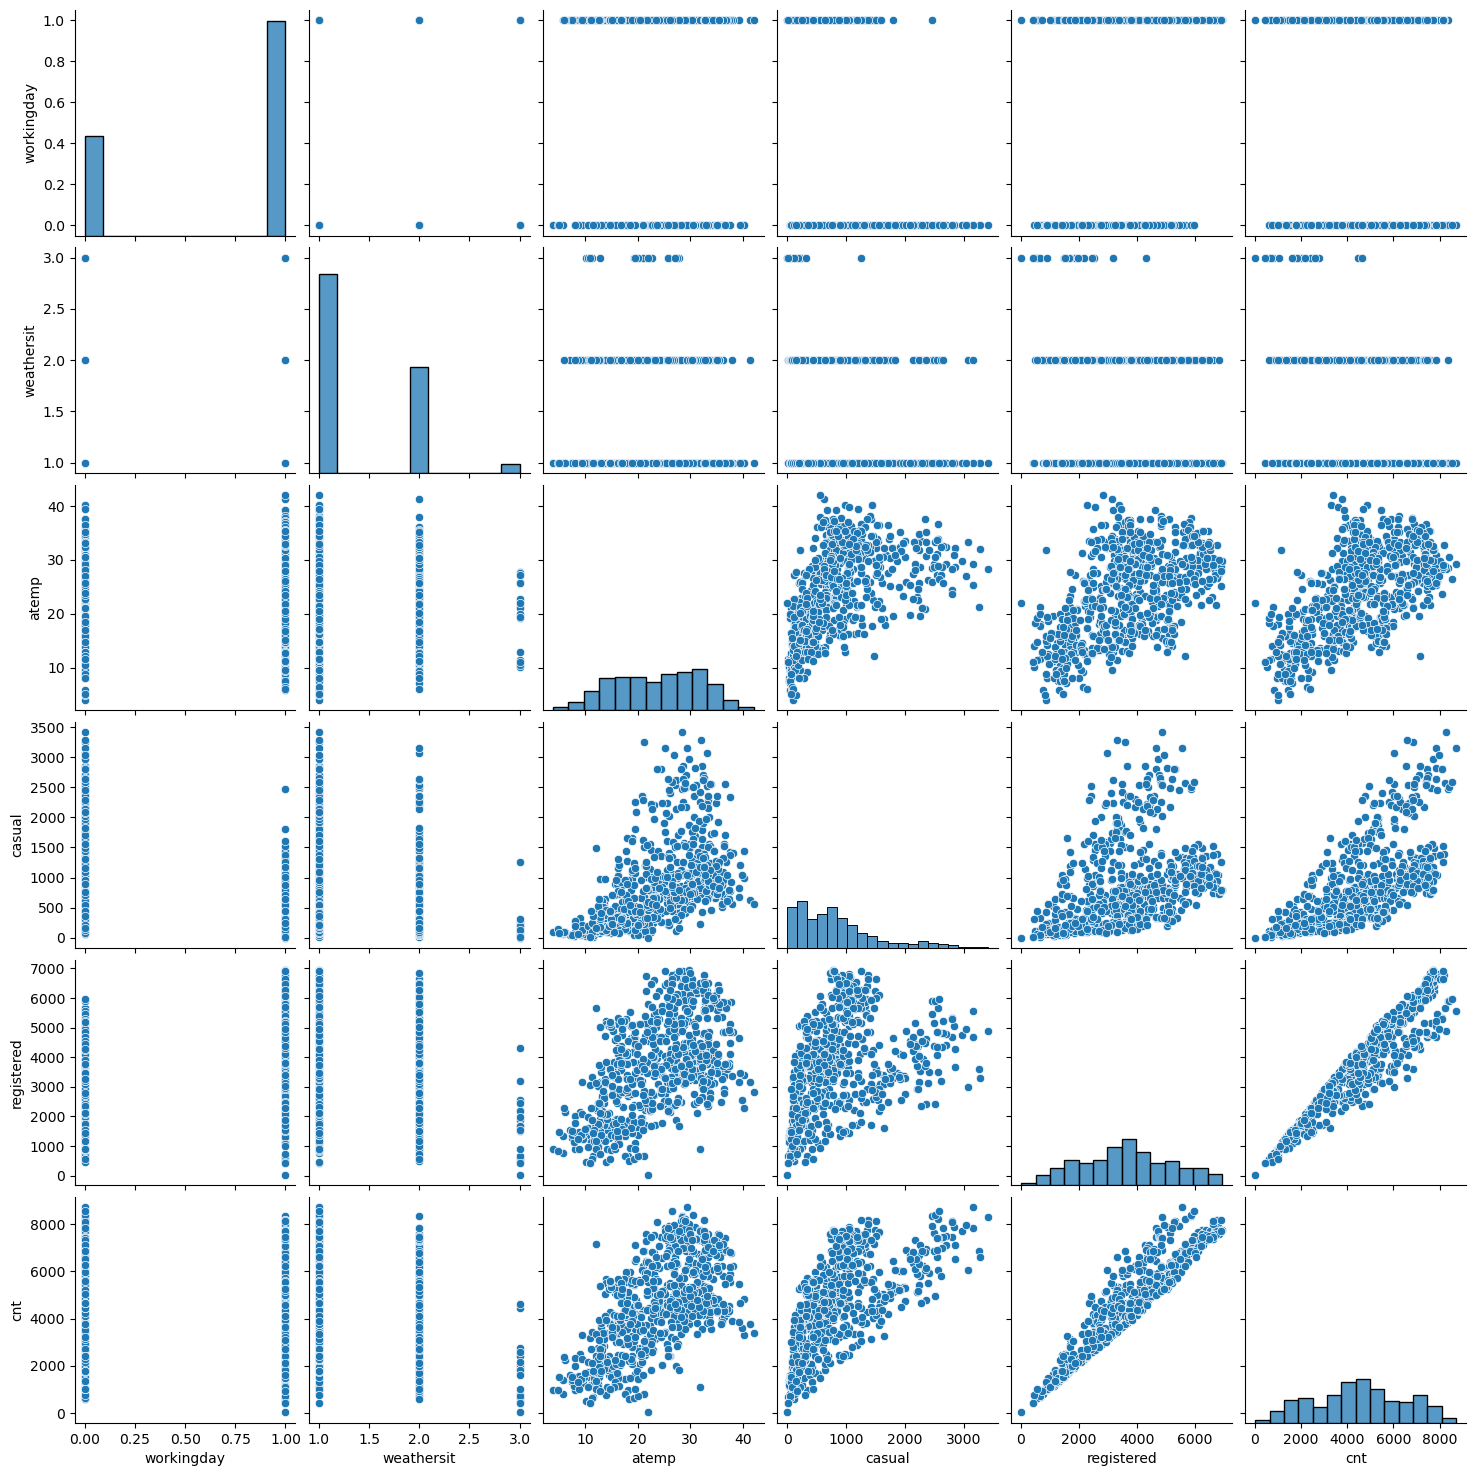

In [11]:
sns.pairplot(new_data)
plt.show()

In [12]:
# There are categorical types of data. The one's that are dot dot dot in one specific part of the graph.

## In the pairplot we just look for the linearity between the variables.

In [13]:
# Checking the relations especifically linearity between all the variables that we have in a pairplot

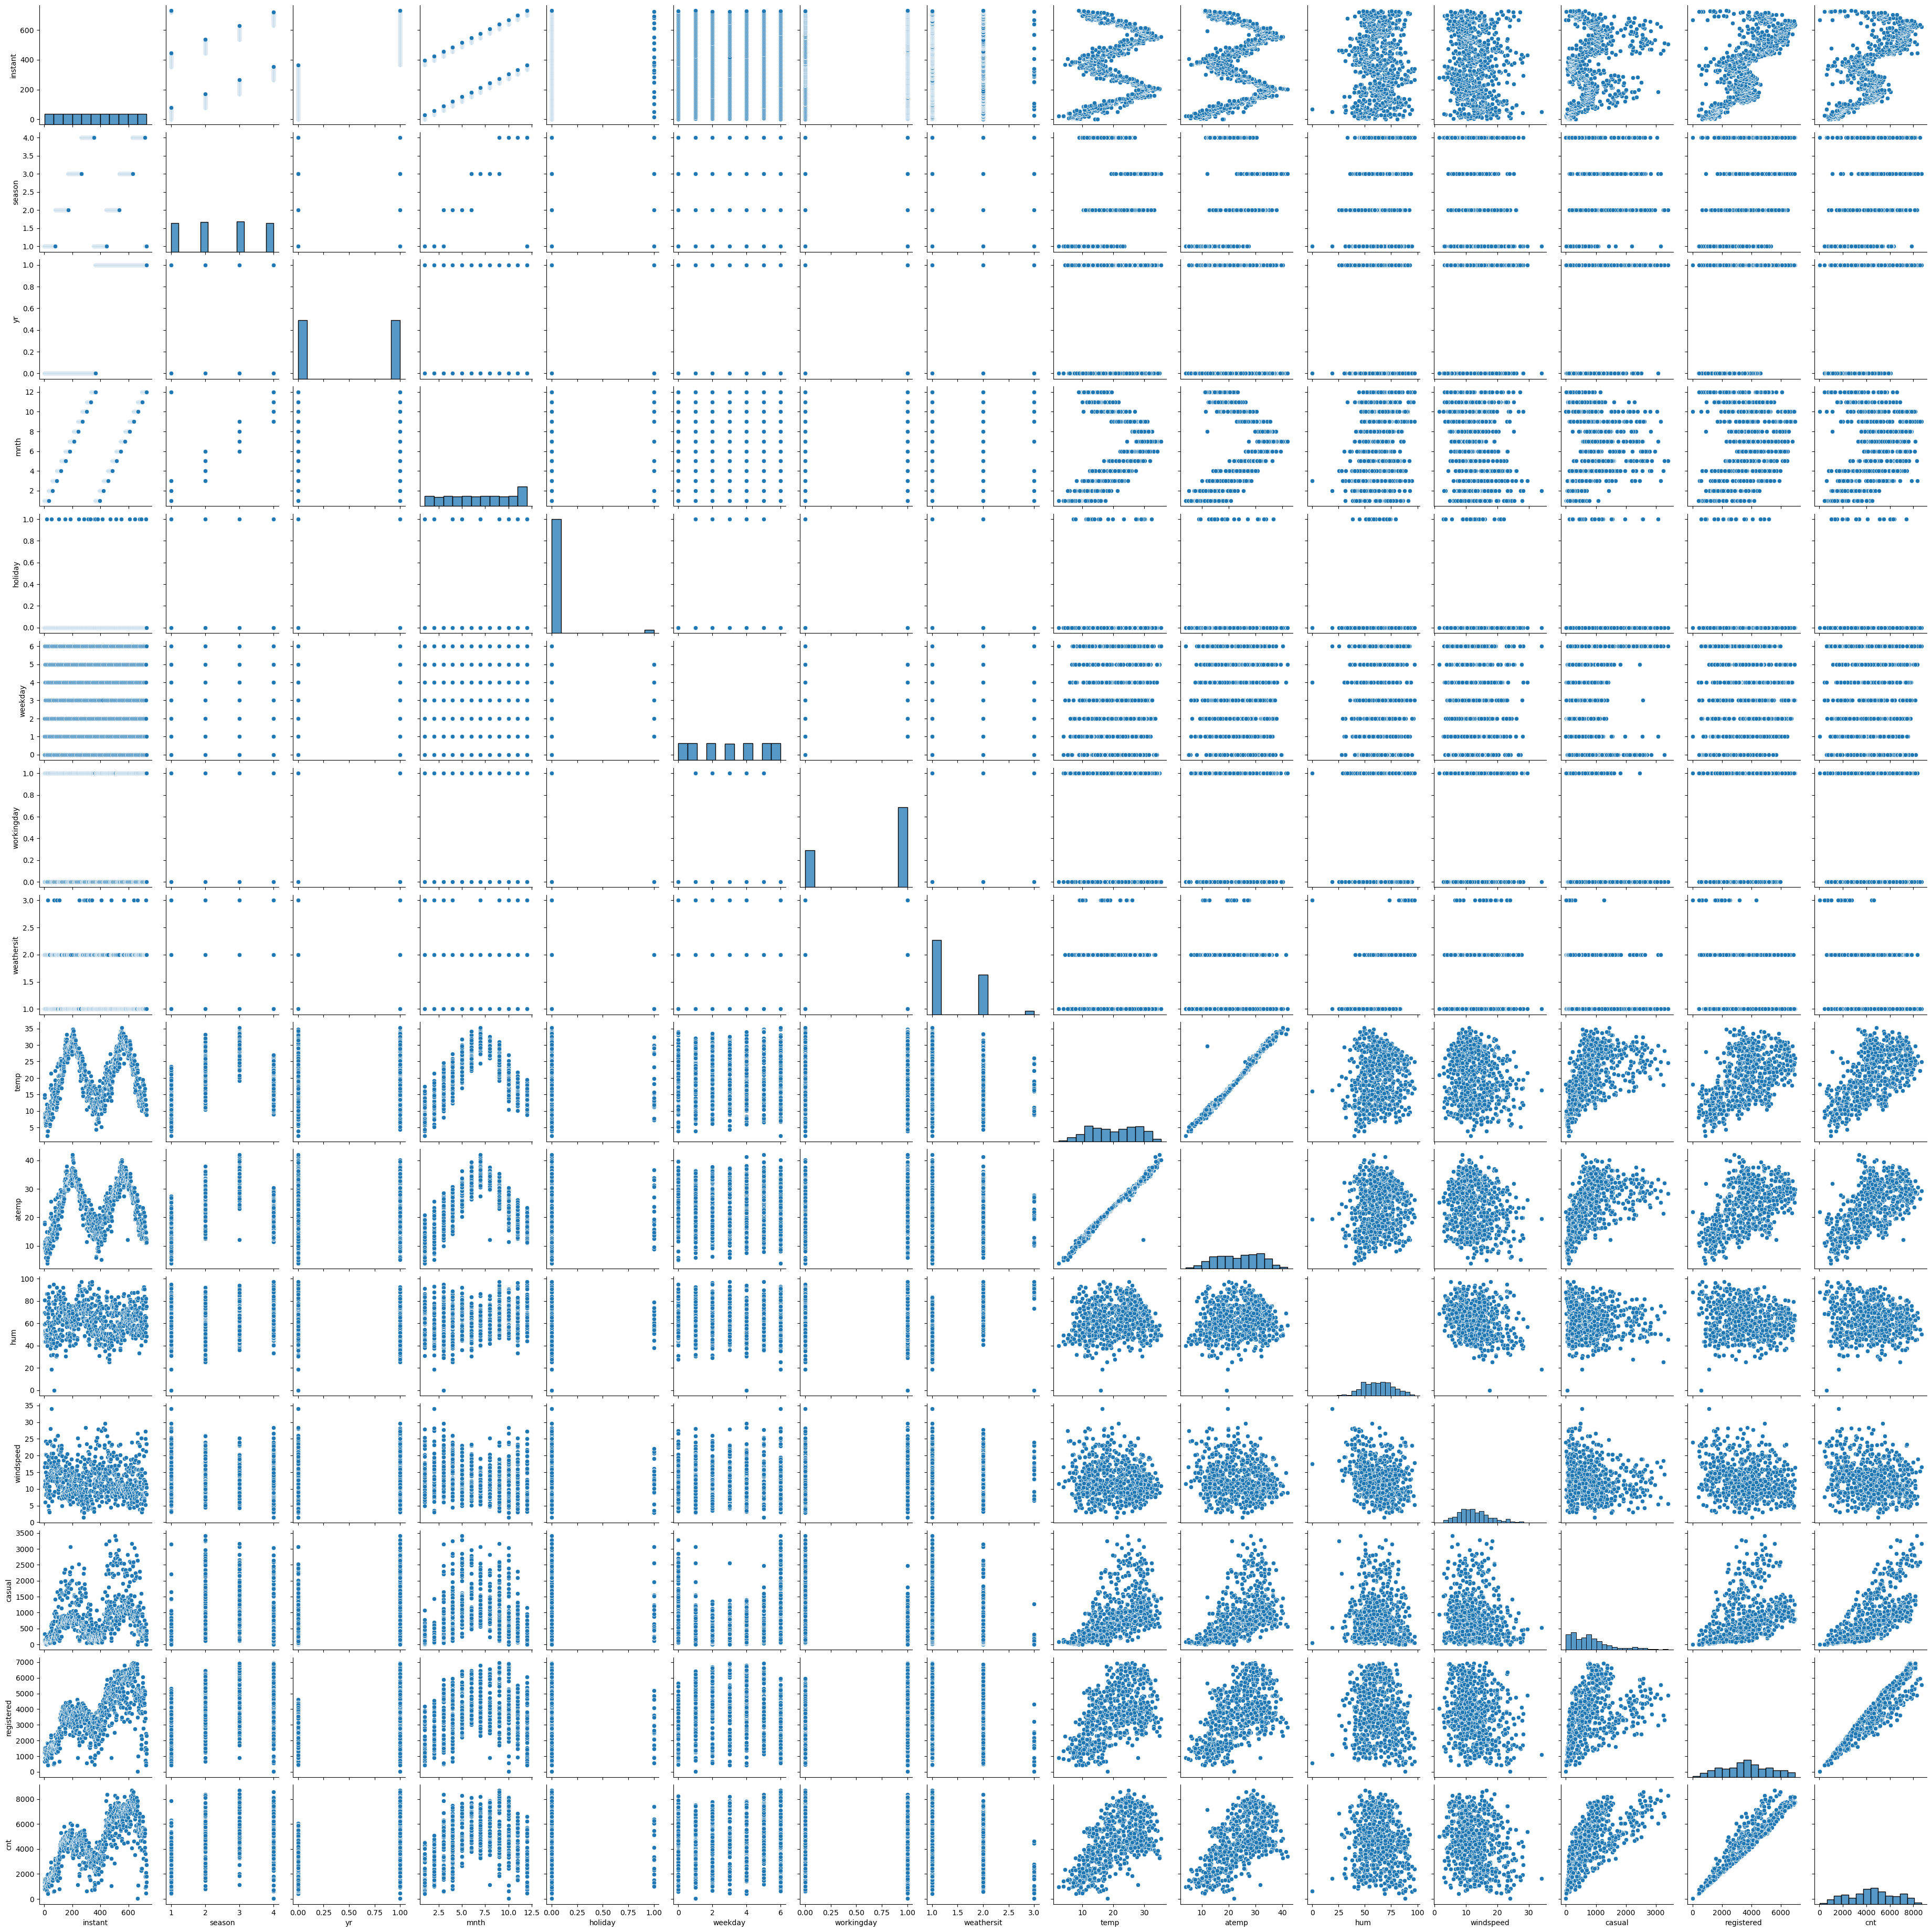

In [14]:
sns.pairplot(data)
plt.show()

### Checking the value_counts of the variables

In [15]:
# Taking the 'season' variable

In [16]:
data.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [17]:
# 'season' is a categorical variable with 4 levels.

In [18]:
# Taking the 'yr' variable.

In [19]:
data.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

In [20]:
# 'yr' is a categorical variable with 2 levels.

In [21]:
# Taking the 'mnth' variable.

In [22]:
data.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

In [23]:
# 'mnth' is a categorical variable with 12 levels.

In [24]:
# Taking the 'weathersit' variable.

In [25]:
data.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [26]:
# 'weathersit' is a categorical variable with 3 levels. However, there exists biasness.

In [27]:
# Taking the 'workingday' variable.

In [28]:
data.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [29]:
# 'workingday' is a categorical variable with 2 levels. However, there exists biasness.

In [30]:
# Taking the 'weekday' variable.

In [31]:
data.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

In [32]:
# 'weekday' is a categorical variable with 7 levels.

In [33]:
# Taking the 'holiday' variable.

In [34]:
data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [35]:
# 'holiday' is a categorical variable with 2 levels. However, there exists biasness.

## Creating a heatmap of the original datsets

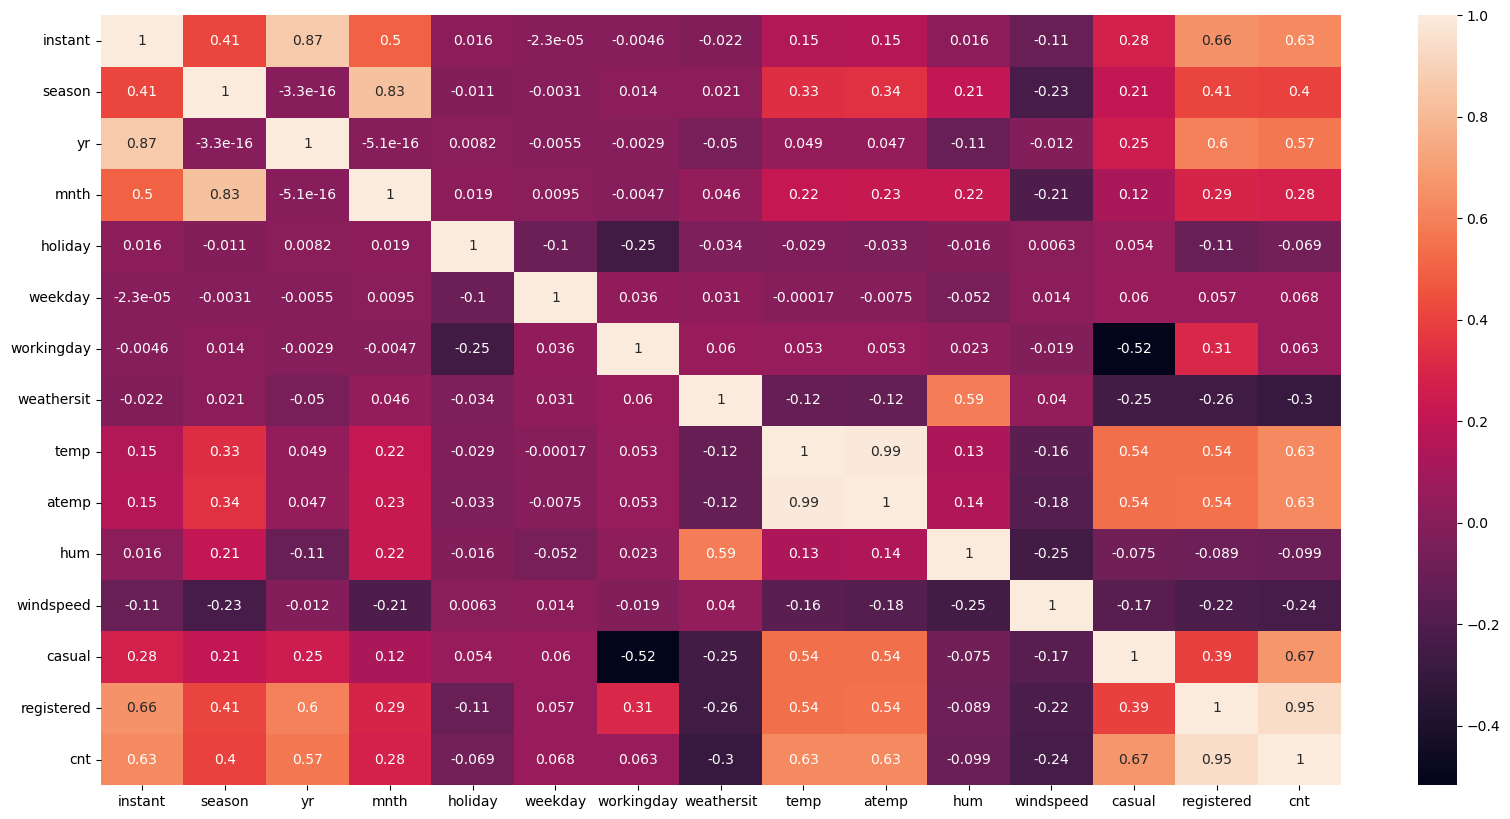

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [37]:
# From the heat map - the value closer to -1 and 1 that represents the two variables are highly correlated with each other.

In [38]:
# We need the value closer to 0 that represents the two variables are not correlated with each other.

### Creating specific labels for categorical variables based on data dictionary

#### In the season column - variable 1 : Spring, variable 2 : Summer, variable 3 : Fall, variable 4 : Winter

In [39]:
data['season'] = data['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [40]:
data

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018  Spring   0     1        0        6           0   
1          2  02-01-2018  Spring   0     1        0        0           0   
2          3  03-01-2018  Spring   0     1        0        1           1   
3          4  04-01-2018  Spring   0     1        0        2           1   
4          5  05-01-2018  Spring   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019  Spring   1    12        0        4           1   
726      727  28-12-2019  Spring   1    12        0        5           1   
727      728  29-12-2019  Spring   1    12        0        6           0   
728      729  30-12-2019  Spring   1    12        0        0           0   
729      730  31-12-2019  Spring   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

#### In the yr column - variable 0 : 2018, variable 1 : 2019

In [41]:
data['yr'] = data['yr'].map({0:'2018',1:'2019'})

In [42]:
data

instant      dteday  season    yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018  Spring  2018     1        0        6           0   
1          2  02-01-2018  Spring  2018     1        0        0           0   
2          3  03-01-2018  Spring  2018     1        0        1           1   
3          4  04-01-2018  Spring  2018     1        0        2           1   
4          5  05-01-2018  Spring  2018     1        0        3           1   
..       ...         ...     ...   ...   ...      ...      ...         ...   
725      726  27-12-2019  Spring  2019    12        0        4           1   
726      727  28-12-2019  Spring  2019    12        0        5           1   
727      728  29-12-2019  Spring  2019    12        0        6           0   
728      729  30-12-2019  Spring  2019    12        0        0           0   
729      730  31-12-2019  Spring  2019    12        0        1           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

#### In the workingday column - variable 0 : No, variable 1 : Yes

In [43]:
data['workingday'] = data['workingday'].map({0:'Working-No',1:'Working-Yes'})

In [44]:
data

instant      dteday  season    yr  mnth  holiday  weekday   workingday  \
0          1  01-01-2018  Spring  2018     1        0        6   Working-No   
1          2  02-01-2018  Spring  2018     1        0        0   Working-No   
2          3  03-01-2018  Spring  2018     1        0        1  Working-Yes   
3          4  04-01-2018  Spring  2018     1        0        2  Working-Yes   
4          5  05-01-2018  Spring  2018     1        0        3  Working-Yes   
..       ...         ...     ...   ...   ...      ...      ...          ...   
725      726  27-12-2019  Spring  2019    12        0        4  Working-Yes   
726      727  28-12-2019  Spring  2019    12        0        5  Working-Yes   
727      728  29-12-2019  Spring  2019    12        0        6   Working-No   
728      729  30-12-2019  Spring  2019    12        0        0   Working-No   
729      730  31-12-2019  Spring  2019    12        0        1  Working-Yes   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

#### In the mnth column - variable 1 : Jan, variable 2 : Feb, variable 3 : Mar, variable 4 : Apr, variable 5 : May, variable 6 : Jun, variable 7 : Jul, variable 8 : Aug, variable 9 : Sep, variable 10 : Oct, variable 11 : Nov, variable 12 : Dec

In [45]:
data['mnth'] = data['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [46]:
data

instant      dteday  season    yr mnth  holiday  weekday   workingday  \
0          1  01-01-2018  Spring  2018  Jan        0        6   Working-No   
1          2  02-01-2018  Spring  2018  Jan        0        0   Working-No   
2          3  03-01-2018  Spring  2018  Jan        0        1  Working-Yes   
3          4  04-01-2018  Spring  2018  Jan        0        2  Working-Yes   
4          5  05-01-2018  Spring  2018  Jan        0        3  Working-Yes   
..       ...         ...     ...   ...  ...      ...      ...          ...   
725      726  27-12-2019  Spring  2019  Dec        0        4  Working-Yes   
726      727  28-12-2019  Spring  2019  Dec        0        5  Working-Yes   
727      728  29-12-2019  Spring  2019  Dec        0        6   Working-No   
728      729  30-12-2019  Spring  2019  Dec        0        0   Working-No   
729      730  31-12-2019  Spring  2019  Dec        0        1  Working-Yes   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

#### In the weathersit column - variable 1 : Cloudly, variable 2 : Misty, variable 3: Light Rain, variable 4 : Heavy Rain

In [47]:
data['weathersit'] = data['weathersit'].map({1:'Cloudly',2:'Misty',3:'Light Rain',4:'Heavy Rain'})

In [48]:
data

instant      dteday  season    yr mnth  holiday  weekday   workingday  \
0          1  01-01-2018  Spring  2018  Jan        0        6   Working-No   
1          2  02-01-2018  Spring  2018  Jan        0        0   Working-No   
2          3  03-01-2018  Spring  2018  Jan        0        1  Working-Yes   
3          4  04-01-2018  Spring  2018  Jan        0        2  Working-Yes   
4          5  05-01-2018  Spring  2018  Jan        0        3  Working-Yes   
..       ...         ...     ...   ...  ...      ...      ...          ...   
725      726  27-12-2019  Spring  2019  Dec        0        4  Working-Yes   
726      727  28-12-2019  Spring  2019  Dec        0        5  Working-Yes   
727      728  29-12-2019  Spring  2019  Dec        0        6   Working-No   
728      729  30-12-2019  Spring  2019  Dec        0        0   Working-No   
729      730  31-12-2019  Spring  2019  Dec        0        1  Working-Yes   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0        Misty  14.110847  18.18125  80.5833  10.749882     331         654   
1        Misty  14.902598  17.68695  69.6087  16.652113     131         670   
2      Cloudly   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Cloudly   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Cloudly   9.305237  11.46350  43.6957  12.522300      82        1518   
..         ...        ...       ...      ...        ...     ...         ...   
725      Misty  10.420847  11.33210  65.2917  23.458911     247        1867   
726      Misty  10.386653  12.75230  59.0000  10.416557     644        2451   
727      Misty  10.386653  12.12000  75.2917   8.333661     159        1182   
728    Cloudly  10.489153  11.58500  48.3333  23.500518     364        1432   
729      Misty   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

#### In the holiday column - variable 0 : No, variable 1 : Yes

#### In the holiday column - variable 0 : No, variable 1 : Yes

In [49]:
data['holiday'] = data['holiday'].map({0:'Holiday',1:'No-Holiday'})

In [50]:
data

instant      dteday  season    yr mnth  holiday  weekday   workingday  \
0          1  01-01-2018  Spring  2018  Jan  Holiday        6   Working-No   
1          2  02-01-2018  Spring  2018  Jan  Holiday        0   Working-No   
2          3  03-01-2018  Spring  2018  Jan  Holiday        1  Working-Yes   
3          4  04-01-2018  Spring  2018  Jan  Holiday        2  Working-Yes   
4          5  05-01-2018  Spring  2018  Jan  Holiday        3  Working-Yes   
..       ...         ...     ...   ...  ...      ...      ...          ...   
725      726  27-12-2019  Spring  2019  Dec  Holiday        4  Working-Yes   
726      727  28-12-2019  Spring  2019  Dec  Holiday        5  Working-Yes   
727      728  29-12-2019  Spring  2019  Dec  Holiday        6   Working-No   
728      729  30-12-2019  Spring  2019  Dec  Holiday        0   Working-No   
729      730  31-12-2019  Spring  2019  Dec  Holiday        1  Working-Yes   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0        Misty  14.110847  18.18125  80.5833  10.749882     331         654   
1        Misty  14.902598  17.68695  69.6087  16.652113     131         670   
2      Cloudly   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Cloudly   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Cloudly   9.305237  11.46350  43.6957  12.522300      82        1518   
..         ...        ...       ...      ...        ...     ...         ...   
725      Misty  10.420847  11.33210  65.2917  23.458911     247        1867   
726      Misty  10.386653  12.75230  59.0000  10.416557     644        2451   
727      Misty  10.386653  12.12000  75.2917   8.333661     159        1182   
728    Cloudly  10.489153  11.58500  48.3333  23.500518     364        1432   
729      Misty   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

#### In the weekday column - variable 0 : Sunday, variable 1 : Monday, variable 2 : Tuesday, variable 3 : Wednesday, variable 4 : Thursday, variable 5 : Friday, variable 6 : Saturday

In [51]:
data['weekday'] = data['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [52]:
data

instant      dteday  season    yr mnth  holiday    weekday   workingday  \
0          1  01-01-2018  Spring  2018  Jan  Holiday   Saturday   Working-No   
1          2  02-01-2018  Spring  2018  Jan  Holiday     Sunday   Working-No   
2          3  03-01-2018  Spring  2018  Jan  Holiday     Monday  Working-Yes   
3          4  04-01-2018  Spring  2018  Jan  Holiday    Tuesday  Working-Yes   
4          5  05-01-2018  Spring  2018  Jan  Holiday  Wednesday  Working-Yes   
..       ...         ...     ...   ...  ...      ...        ...          ...   
725      726  27-12-2019  Spring  2019  Dec  Holiday   Thursday  Working-Yes   
726      727  28-12-2019  Spring  2019  Dec  Holiday     Friday  Working-Yes   
727      728  29-12-2019  Spring  2019  Dec  Holiday   Saturday   Working-No   
728      729  30-12-2019  Spring  2019  Dec  Holiday     Sunday   Working-No   
729      730  31-12-2019  Spring  2019  Dec  Holiday     Monday  Working-Yes   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0        Misty  14.110847  18.18125  80.5833  10.749882     331         654   
1        Misty  14.902598  17.68695  69.6087  16.652113     131         670   
2      Cloudly   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Cloudly   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Cloudly   9.305237  11.46350  43.6957  12.522300      82        1518   
..         ...        ...       ...      ...        ...     ...         ...   
725      Misty  10.420847  11.33210  65.2917  23.458911     247        1867   
726      Misty  10.386653  12.75230  59.0000  10.416557     644        2451   
727      Misty  10.386653  12.12000  75.2917   8.333661     159        1182   
728    Cloudly  10.489153  11.58500  48.3333  23.500518     364        1432   
729      Misty   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729  

[730 rows x 16 columns]

#### For understanding what we did above clearly, we create a new data frame for each columns where we have changed the values of the variables

In [53]:
# Creating datadf_season variable to store and display the new data frame which consists of new values of the Season column.

In [54]:
datadf_season=pd.DataFrame({'Number':[1,2,3,4],'Season':['Spring','Summer','Fall','Winter']})
datadf_season

Number  Season
0       1  Spring
1       2  Summer
2       3    Fall
3       4  Winter

In [55]:
# Creating datadf_yr variable to store and display the new data frame which consists of new values of the yr column.

In [56]:
datadf_yr=pd.DataFrame({'Number':[0,1],'yr':['2018','2019']})
datadf_yr

Number    yr
0       0  2018
1       1  2019

In [57]:
# Creating datadf_workingday variable to store and display the new data frame which consists of new values of the workingday column.

In [58]:
datadf_workingday=pd.DataFrame({'Number':[0,1],'workingday':['Working-No','Working-Yes']})
datadf_workingday

Number   workingday
0       0   Working-No
1       1  Working-Yes

In [59]:
# Creating datadf_mnth variable to store and display the new data frame which consists of new values of the mnth column.

In [60]:
datadf_mnth=pd.DataFrame({'Number':[1,2,3,4,5,6,7,8,9,10,11,12],'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']})
datadf_mnth

Number month
0        1   Jan
1        2   Feb
2        3   Mar
3        4   Apr
4        5   May
5        6   Jun
6        7   Jul
7        8   Aug
8        9   Sep
9       10   Oct
10      11   Nov
11      12   Dec

In [61]:
# Creating datadf_weekday variable to store and display the new data frame which consists of new values of the weekday column.

In [62]:
datadf_weekday=pd.DataFrame({'Number':[0,1,2,3,4,5,6],'weekday':['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']})
datadf_weekday

Number    weekday
0       0     Sunday
1       1     Monday
2       2    Tuesday
3       3  Wednesday
4       4   Thursday
5       5     Friday
6       6   Saturday

In [63]:
# Creating datadf_weathersit variable to store and display the new data frame which consists of new values of the weathersit column.

In [64]:
datadf_weathersit=pd.DataFrame({'Number':[1,2,3,4],'weathersit':['Cloudy','Misty','Light Rain','Heavy Rain']})
datadf_weathersit

Number  weathersit
0       1      Cloudy
1       2       Misty
2       3  Light Rain
3       4  Heavy Rain

### Creating dummy variable 

#### In linear regression dummy variables are used to represent categorical variables.

In [65]:
# Creating a season_dummy variable to store and display the categorical values of season column. 1 represents yes and 0 represents no.

In [66]:
season_dummy = pd.get_dummies(data.season, drop_first = True)
season_dummy.head(10)

Spring  Summer  Winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
5       1       0       0
6       1       0       0
7       1       0       0
8       1       0       0
9       1       0       0

In [67]:
# Creating a yr_dummy variable to store and display the categorical values of yr column. 1 represents yes and 0 represents no.

In [68]:
yr_dummy= pd.get_dummies(data.yr, drop_first = True)
yr_dummy.head(10)

2019
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0

In [69]:
# Creating a mnth_dummy variable to store and display the categorical values of mnth column. 1 represents yes and 0 represents no.

In [70]:
mnth_dummy= pd.get_dummies(data.mnth, drop_first = True)
mnth_dummy.head(10)

Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0
5    0    0    0    1    0    0    0    0    0    0    0
6    0    0    0    1    0    0    0    0    0    0    0
7    0    0    0    1    0    0    0    0    0    0    0
8    0    0    0    1    0    0    0    0    0    0    0
9    0    0    0    1    0    0    0    0    0    0    0

In [71]:
# Creating a holiday_dummy variable to store and display the categorical values of holiday column. 1 represents yes and 0 represents no.

In [72]:
holiday_dummy= pd.get_dummies(data.holiday, drop_first = True)
holiday_dummy.head(10)

No-Holiday
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0

In [73]:
# Creating a weekday_dummy variable to store and display the categorical values of weekday column. 1 represents yes and 0 represents no.

In [74]:
weekday_dummy= pd.get_dummies(data.weekday, drop_first = True)
weekday_dummy.head(10)

Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0       0         1       0         0        0          0
1       0         0       1         0        0          0
2       1         0       0         0        0          0
3       0         0       0         0        1          0
4       0         0       0         0        0          1
5       0         0       0         1        0          0
6       0         0       0         0        0          0
7       0         1       0         0        0          0
8       0         0       1         0        0          0
9       1         0       0         0        0          0

In [75]:
# Creating a workingday_dummy variable to store and display the categorical values of workingday column. 1 represents yes and 0 represents no.

In [76]:
workingday_dummy= pd.get_dummies(data.workingday, drop_first = True)
workingday_dummy.head(10)

Working-Yes
0            0
1            0
2            1
3            1
4            1
5            1
6            1
7            0
8            0
9            1

In [77]:
# Creating a weathersit_dummy variable to store and display the categorical values of weathersit column. 1 represents yes and 0 represents no.

In [78]:
weathersit_dummy= pd.get_dummies(data.weathersit, drop_first = True)
weathersit_dummy.head(10)

Light Rain  Misty
0           0      1
1           0      1
2           0      0
3           0      0
4           0      0
5           0      0
6           0      1
7           0      1
8           0      0
9           0      0

## Creating new dataframes for each individual numerical variables

In [79]:
# creating a new temp dataframe to store the temp variable from our main data set (data)

In [80]:
temp = data['temp']

In [81]:
# creating a new atemp dataframe to store the atemp variable from our main data set (data)

In [82]:
atemp = data['atemp']

In [83]:
# creating a new hum dataframe to store the hum variable from our main data set (data)

In [84]:
hum = data['hum']

In [85]:
# creating a new casual dataframe to store the casual variable from our main data set (data)

In [86]:
casual = data['casual']

In [87]:
# creating a new registered dataframe to store the registered variable from our main data set (data)

In [88]:
registered = data['registered']

In [89]:
# creating a new cnt dataframe to store the cnt variable from our main data set (data)

In [90]:
cnt = data['cnt']

In [91]:
# creating a new windspeed dataframe to store the windspeed variable from our main data set (data)

In [92]:
windspeed = data['windspeed']

In [93]:
# concating the dummy dataframe with the variable named final

final = pd.concat([temp,atemp,hum,casual,registered,cnt],axis=1)
final

temp     atemp      hum  casual  registered   cnt
0    14.110847  18.18125  80.5833     331         654   985
1    14.902598  17.68695  69.6087     131         670   801
2     8.050924   9.47025  43.7273     120        1229  1349
3     8.200000  10.60610  59.0435     108        1454  1562
4     9.305237  11.46350  43.6957      82        1518  1600
..         ...       ...      ...     ...         ...   ...
725  10.420847  11.33210  65.2917     247        1867  2114
726  10.386653  12.75230  59.0000     644        2451  3095
727  10.386653  12.12000  75.2917     159        1182  1341
728  10.489153  11.58500  48.3333     364        1432  1796
729   8.849153  11.17435  57.7500     439        2290  2729

[730 rows x 6 columns]

In [94]:
# concating the dummy dataframe with the variable named final_data

final_data = pd.concat([cnt, casual, registered, temp, atemp, hum, windspeed, season_dummy,yr_dummy,mnth_dummy, holiday_dummy, weekday_dummy, workingday_dummy, weathersit_dummy],axis=1)
final_data

cnt  casual  registered       temp     atemp      hum  windspeed  \
0     985     331         654  14.110847  18.18125  80.5833  10.749882   
1     801     131         670  14.902598  17.68695  69.6087  16.652113   
2    1349     120        1229   8.050924   9.47025  43.7273  16.636703   
3    1562     108        1454   8.200000  10.60610  59.0435  10.739832   
4    1600      82        1518   9.305237  11.46350  43.6957  12.522300   
..    ...     ...         ...        ...       ...      ...        ...   
725  2114     247        1867  10.420847  11.33210  65.2917  23.458911   
726  3095     644        2451  10.386653  12.75230  59.0000  10.416557   
727  1341     159        1182  10.386653  12.12000  75.2917   8.333661   
728  1796     364        1432  10.489153  11.58500  48.3333  23.500518   
729  2729     439        2290   8.849153  11.17435  57.7500  10.374682   

     Spring  Summer  Winter  ...  No-Holiday  Monday  Saturday  Sunday  \
0         1       0       0  ...           0       0         1       0   
1         1       0       0  ...           0       0         0       1   
2         1       0       0  ...           0       1         0       0   
3         1       0       0  ...           0       0         0       0   
4         1       0       0  ...           0       0         0       0   
..      ...     ...     ...  ...         ...     ...       ...     ...   
725       1       0       0  ...           0       0         0       0   
726       1       0       0  ...           0       0         0       0   
727       1       0       0  ...           0       0         1       0   
728       1       0       0  ...           0       0         0       1   
729       1       0       0  ...           0       1         0       0   

     Thursday  Tuesday  Wednesday  Working-Yes  Light Rain  Misty  
0           0        0          0            0           0      1  
1           0        0          0            0           0      1  
2           0        0          0            1           0      0  
3           0        1          0            1           0      0  
4           0        0          1            1           0      0  
..        ...      ...        ...          ...         ...    ...  
725         1        0          0            1           0      1  
726         0        0          0            1           0      1  
727         0        0          0            0           0      1  
728         0        0          0            0           0      0  
729         0        0          0            1           0      1  

[730 rows x 32 columns]

In [95]:
# dropping the related variables after creating dummies

In [96]:
final_data = final_data.drop(['casual'],axis=1)
final_data

cnt  registered       temp     atemp      hum  windspeed  Spring  \
0     985         654  14.110847  18.18125  80.5833  10.749882       1   
1     801         670  14.902598  17.68695  69.6087  16.652113       1   
2    1349        1229   8.050924   9.47025  43.7273  16.636703       1   
3    1562        1454   8.200000  10.60610  59.0435  10.739832       1   
4    1600        1518   9.305237  11.46350  43.6957  12.522300       1   
..    ...         ...        ...       ...      ...        ...     ...   
725  2114        1867  10.420847  11.33210  65.2917  23.458911       1   
726  3095        2451  10.386653  12.75230  59.0000  10.416557       1   
727  1341        1182  10.386653  12.12000  75.2917   8.333661       1   
728  1796        1432  10.489153  11.58500  48.3333  23.500518       1   
729  2729        2290   8.849153  11.17435  57.7500  10.374682       1   

     Summer  Winter  2019  ...  No-Holiday  Monday  Saturday  Sunday  \
0         0       0     0  ...           0       0         1       0   
1         0       0     0  ...           0       0         0       1   
2         0       0     0  ...           0       1         0       0   
3         0       0     0  ...           0       0         0       0   
4         0       0     0  ...           0       0         0       0   
..      ...     ...   ...  ...         ...     ...       ...     ...   
725       0       0     1  ...           0       0         0       0   
726       0       0     1  ...           0       0         0       0   
727       0       0     1  ...           0       0         1       0   
728       0       0     1  ...           0       0         0       1   
729       0       0     1  ...           0       1         0       0   

     Thursday  Tuesday  Wednesday  Working-Yes  Light Rain  Misty  
0           0        0          0            0           0      1  
1           0        0          0            0           0      1  
2           0        0          0            1           0      0  
3           0        1          0            1           0      0  
4           0        0          1            1           0      0  
..        ...      ...        ...          ...         ...    ...  
725         1        0          0            1           0      1  
726         0        0          0            1           0      1  
727         0        0          0            0           0      1  
728         0        0          0            0           0      0  
729         0        0          0            1           0      1  

[730 rows x 31 columns]

In [97]:
final_data = final_data.drop(['registered'],axis=1)
final_data

cnt       temp     atemp      hum  windspeed  Spring  Summer  Winter  \
0     985  14.110847  18.18125  80.5833  10.749882       1       0       0   
1     801  14.902598  17.68695  69.6087  16.652113       1       0       0   
2    1349   8.050924   9.47025  43.7273  16.636703       1       0       0   
3    1562   8.200000  10.60610  59.0435  10.739832       1       0       0   
4    1600   9.305237  11.46350  43.6957  12.522300       1       0       0   
..    ...        ...       ...      ...        ...     ...     ...     ...   
725  2114  10.420847  11.33210  65.2917  23.458911       1       0       0   
726  3095  10.386653  12.75230  59.0000  10.416557       1       0       0   
727  1341  10.386653  12.12000  75.2917   8.333661       1       0       0   
728  1796  10.489153  11.58500  48.3333  23.500518       1       0       0   
729  2729   8.849153  11.17435  57.7500  10.374682       1       0       0   

     2019  Aug  ...  No-Holiday  Monday  Saturday  Sunday  Thursday  Tuesday  \
0       0    0  ...           0       0         1       0         0        0   
1       0    0  ...           0       0         0       1         0        0   
2       0    0  ...           0       1         0       0         0        0   
3       0    0  ...           0       0         0       0         0        1   
4       0    0  ...           0       0         0       0         0        0   
..    ...  ...  ...         ...     ...       ...     ...       ...      ...   
725     1    0  ...           0       0         0       0         1        0   
726     1    0  ...           0       0         0       0         0        0   
727     1    0  ...           0       0         1       0         0        0   
728     1    0  ...           0       0         0       1         0        0   
729     1    0  ...           0       1         0       0         0        0   

     Wednesday  Working-Yes  Light Rain  Misty  
0            0            0           0      1  
1            0            0           0      1  
2            0            1           0      0  
3            0            1           0      0  
4            1            1           0      0  
..         ...          ...         ...    ...  
725          0            1           0      1  
726          0            1           0      1  
727          0            0           0      1  
728          0            0           0      0  
729          0            1           0      1  

[730 rows x 30 columns]

In [98]:
final_data = final_data.drop(['atemp'],axis=1)
final_data

cnt       temp      hum  windspeed  Spring  Summer  Winter  2019  Aug  \
0     985  14.110847  80.5833  10.749882       1       0       0     0    0   
1     801  14.902598  69.6087  16.652113       1       0       0     0    0   
2    1349   8.050924  43.7273  16.636703       1       0       0     0    0   
3    1562   8.200000  59.0435  10.739832       1       0       0     0    0   
4    1600   9.305237  43.6957  12.522300       1       0       0     0    0   
..    ...        ...      ...        ...     ...     ...     ...   ...  ...   
725  2114  10.420847  65.2917  23.458911       1       0       0     1    0   
726  3095  10.386653  59.0000  10.416557       1       0       0     1    0   
727  1341  10.386653  75.2917   8.333661       1       0       0     1    0   
728  1796  10.489153  48.3333  23.500518       1       0       0     1    0   
729  2729   8.849153  57.7500  10.374682       1       0       0     1    0   

     Dec  ...  No-Holiday  Monday  Saturday  Sunday  Thursday  Tuesday  \
0      0  ...           0       0         1       0         0        0   
1      0  ...           0       0         0       1         0        0   
2      0  ...           0       1         0       0         0        0   
3      0  ...           0       0         0       0         0        1   
4      0  ...           0       0         0       0         0        0   
..   ...  ...         ...     ...       ...     ...       ...      ...   
725    1  ...           0       0         0       0         1        0   
726    1  ...           0       0         0       0         0        0   
727    1  ...           0       0         1       0         0        0   
728    1  ...           0       0         0       1         0        0   
729    1  ...           0       1         0       0         0        0   

     Wednesday  Working-Yes  Light Rain  Misty  
0            0            0           0      1  
1            0            0           0      1  
2            0            1           0      0  
3            0            1           0      0  
4            1            1           0      0  
..         ...          ...         ...    ...  
725          0            1           0      1  
726          0            1           0      1  
727          0            0           0      1  
728          0            0           0      0  
729          0            1           0      1  

[730 rows x 29 columns]

In [99]:
final_data.shape

(730, 29)

In [100]:
#importing relevant packages

import sklearn
from sklearn.model_selection import train_test_split

In [101]:
# dividing the data into train and test split

final_train, final_test = train_test_split(final_data, train_size = 0.8, random_state = 365)

In [102]:
final_train.shape

(584, 29)

In [103]:
final_test.shape

(146, 29)

### Performing Rescaling of Numeric variables

In [104]:
# we are using a min-max scalaer for rescaling 

In [105]:
#importing relevant packages

from sklearn.preprocessing import MinMaxScaler

In [106]:
#Initiating scaler object

scaler = MinMaxScaler()

In [107]:
#creating a list of numeric variables

numeric = ['temp','hum','windspeed','cnt']

In [108]:
#fitting the scaler on the dataframe

final_train[numeric] = scaler.fit_transform(final_train[numeric])

In [109]:
final_train.head()

cnt      temp       hum  windspeed  Spring  Summer  Winter  2019  \
252  0.612402  0.748713  0.775064   0.273132       0       0       0     0   
659  0.809480  0.533770  0.584404   0.091072       0       0       1     1   
563  0.654740  0.914852  0.593402   0.232326       0       0       0     1   
404  0.438104  0.256524  0.577977   0.375185       1       0       0     1   
407  0.173378  0.085192  0.477720   0.918338       1       0       0     1   

     Aug  Dec  ...  No-Holiday  Monday  Saturday  Sunday  Thursday  Tuesday  \
252    0    0  ...           0       0         1       0         0        0   
659    0    0  ...           0       1         0       0         0        0   
563    0    0  ...           0       0         0       0         0        0   
404    0    0  ...           0       0         0       0         1        0   
407    0    0  ...           0       0         0       1         0        0   

     Wednesday  Working-Yes  Light Rain  Misty  
252          0            0           0      0  
659          0            1           0      0  
563          1            1           0      0  
404          0            1           0      0  
407          0            0           0      0  

[5 rows x 29 columns]

In [110]:
final_train.describe()

cnt        temp         hum   windspeed      Spring      Summer  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.516668    0.542103    0.645007    0.372266    0.250000    0.258562   
std      0.222304    0.229839    0.147533    0.198543    0.433384    0.438220   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.366947    0.340632    0.527849    0.227213    0.000000    0.000000   
50%      0.521054    0.545191    0.642245    0.348492    0.000000    0.000000   
75%      0.685285    0.740665    0.750750    0.482309    0.250000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           Winter        2019         Aug         Dec  ...  No-Holiday  \
count  584.000000  584.000000  584.000000  584.000000  ...  584.000000   
mean     0.238014    0.515411    0.085616    0.078767  ...    0.025685   
std      0.426233    0.500191    0.280037    0.269606  ...    0.158329   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    1.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    1.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

           Monday    Saturday      Sunday    Thursday     Tuesday   Wednesday  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean     0.147260    0.148973    0.145548    0.140411    0.142123    0.140411   
std      0.354669    0.356367    0.352955    0.347711    0.349476    0.347711   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       Working-Yes  Light Rain       Misty  
count   584.000000  584.000000  584.000000  
mean      0.679795    0.029110    0.347603  
std       0.466955    0.168258    0.476617  
min       0.000000    0.000000    0.000000  
25%       0.000000    0.000000    0.000000  
50%       1.000000    0.000000    0.000000  
75%       1.000000    0.000000    1.000000  
max       1.000000    1.000000    1.000000  

[8 rows x 29 columns]

### Dividing the data in x and y

In [111]:
y_train = final_train.pop('cnt')
x_train = final_train

In [112]:
# observing y train

y_train.head()

252    0.612402
659    0.809480
563    0.654740
404    0.438104
407    0.173378
Name: cnt, dtype: float64

In [113]:
# observing x train

x_train.head()

temp       hum  windspeed  Spring  Summer  Winter  2019  Aug  Dec  \
252  0.748713  0.775064   0.273132       0       0       0     0    0    0   
659  0.533770  0.584404   0.091072       0       0       1     1    0    0   
563  0.914852  0.593402   0.232326       0       0       0     1    0    0   
404  0.256524  0.577977   0.375185       1       0       0     1    0    0   
407  0.085192  0.477720   0.918338       1       0       0     1    0    0   

     Feb  ...  No-Holiday  Monday  Saturday  Sunday  Thursday  Tuesday  \
252    0  ...           0       0         1       0         0        0   
659    0  ...           0       1         0       0         0        0   
563    0  ...           0       0         0       0         0        0   
404    1  ...           0       0         0       0         1        0   
407    1  ...           0       0         0       1         0        0   

     Wednesday  Working-Yes  Light Rain  Misty  
252          0            0           0      0  
659          0            1           0      0  
563          1            1           0      0  
404          0            1           0      0  
407          0            0           0      0  

[5 rows x 28 columns]

In [114]:
final_data.columns.values

array(['cnt', 'temp', 'hum', 'windspeed', 'Spring', 'Summer', 'Winter',
       '2019', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'No-Holiday', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'Working-Yes', 'Light Rain',
       'Misty'], dtype=object)

## Data Modeling

In [115]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
# adding constant as statsmodel.api doesnot include constant

x_train_sm = sm.add_constant(x_train)

# creating the model based on Ordinary Least Squares (OLS)

lr = sm.OLS(y_train, x_train_sm)

# fitting the straight line that best fits to our dataset

lr_model = lr.fit()

#printing the summary of the model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     114.2
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          4.96e-207
Time:                        20:15:13   Log-Likelihood:                 598.66
No. Observations:                 584   AIC:                            -1141.
Df Residuals:                     556   BIC:                            -1019.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3130      0.033      9.399      0.000       0.248       0.378
temp            0.4085      0.043      9.539      0.000       0.324       0.493
hum            -0.1652      0.036     -4.580      0.000      -0.236      -0.094
windspeed      -0.1395      0.020     -6.840      0.000      -0.180      -0.099
Spring         -0.1040      0.028     -3.712      0.000      -0.159      -0.049
Summer         -0.0076      0.024     -0.310      0.757      -0.056       0.040
Winter          0.0940      0.026      3.672      0.000       0.044       0.144
2019            0.2318      0.008     30.627      0.000       0.217       0.247
Aug            -0.0282      0.031     -0.904      0.366      -0.089       0.033
Dec            -0.0881      0.032     -2.754      0.006      -0.151      -0.025
Feb            -0.0442      0.032     -1.382      0.167      -0.107       0.019
Jan            -0.0713      0.032     -2.222      0.027      -0.134      -0.008
Jul            -0.0693      0.032     -2.174      0.030      -0.132      -0.007
Jun             0.0026      0.022      0.120      0.904      -0.040       0.045
Mar             0.0090      0.024      0.379      0.705      -0.037       0.055
May             0.0226      0.019      1.182      0.238      -0.015       0.060
Nov            -0.0879      0.035     -2.548      0.011      -0.156      -0.020
Oct            -0.0245      0.033     -0.733      0.464      -0.090       0.041
Sep             0.0342      0.030      1.147      0.252      -0.024       0.093
No-Holiday      0.0657      0.022      2.970      0.003       0.022       0.109
Monday         -0.0307      0.014     -2.168      0.031      -0.059      -0.003
Saturday        0.0980      0.013      7.706      0.000       0.073       0.123
Sunday          0.0497      0.013      3.826      0.000       0.024       0.075
Thursday       -0.0044      0.014     -0.308      0.758      -0.032       0.023
Tuesday        -0.0208      0.014     -1.476      0.140      -0.048       0.007
Wednesday      -0.0112      0.014     -0.786      0.432      -0.039       0.017
Working-Yes     0.0996      0.012      8.491      0.000       0.077       0.123
Light Rain     -0.2350      0.025     -9.331      0.000      -0.284      -0.186
Misty          -0.0533      0.010     -5.414      0.000      -0.073      -0.034
==============================================================================
Omnibus:                      107.670   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.065
Skew:                          -0.901   Prob(JB):                     1.55e-66
Kurtosis:                       6.035   Cond. No.                     1.02e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covar

In [117]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = x_train.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

variables    VIF
25  Working-Yes  88.31
20     Saturday  18.97
21       Sunday  18.82
3        Spring  10.86
5        Winter   8.76
4        Summer   8.43
0          temp   7.14
16          Oct   6.70
10          Jan   6.59
15          Nov   6.50
11          Jul   6.08
7           Aug   5.62
8           Dec   5.48
9           Feb   4.92
18   No-Holiday   4.49
17          Sep   4.48
13          Mar   3.17
12          Jun   2.59
1           hum   2.08
14          May   2.03
19       Monday   1.86
23      Tuesday   1.79
24    Wednesday   1.79
22     Thursday   1.78
27        Misty   1.62
26   Light Rain   1.32
2     windspeed   1.21
6          2019   1.06

### Checking the data and removing variables based on significance

In [118]:
# 'Mar' has the lowest signifiance amongst the variables

x = x_train.drop('Mar', axis =1)

In [119]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     118.8
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          4.84e-208
Time:                        20:15:15   Log-Likelihood:                 598.59
No. Observations:                 584   AIC:                            -1143.
Df Residuals:                     557   BIC:                            -1025.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3173      0.031     10.145      0.000       0.256       0.379
temp            0.4053      0.042      9.665      0.000       0.323       0.488
hum            -0.1640      0.036     -4.568      0.000      -0.235      -0.093
windspeed      -0.1396      0.020     -6.850      0.000      -0.180      -0.100
Spring         -0.1004      0.026     -3.809      0.000      -0.152      -0.049
Summer         -0.0096      0.024     -0.405      0.686      -0.056       0.037
Winter          0.0960      0.025      3.839      0.000       0.047       0.145
2019            0.2320      0.008     30.705      0.000       0.217       0.247
Aug            -0.0319      0.030     -1.076      0.282      -0.090       0.026
Dec            -0.0960      0.024     -3.962      0.000      -0.144      -0.048
Feb            -0.0530      0.022     -2.436      0.015      -0.096      -0.010
Jan            -0.0804      0.021     -3.751      0.000      -0.122      -0.038
Jul            -0.0727      0.031     -2.383      0.018      -0.133      -0.013
Jun             0.0003      0.021      0.013      0.989      -0.040       0.041
May             0.0204      0.018      1.121      0.263      -0.015       0.056
Nov            -0.0950      0.029     -3.273      0.001      -0.152      -0.038
Oct            -0.0312      0.028     -1.096      0.273      -0.087       0.025
Sep             0.0295      0.027      1.088      0.277      -0.024       0.083
No-Holiday      0.0666      0.022      3.024      0.003       0.023       0.110
Monday         -0.0307      0.014     -2.168      0.031      -0.059      -0.003
Saturday        0.0992      0.012      8.066      0.000       0.075       0.123
Sunday          0.0508      0.013      4.027      0.000       0.026       0.076
Thursday       -0.0041      0.014     -0.289      0.773      -0.032       0.024
Tuesday        -0.0207      0.014     -1.472      0.141      -0.048       0.007
Wednesday      -0.0111      0.014     -0.782      0.434      -0.039       0.017
Working-Yes     0.1007      0.011      8.884      0.000       0.078       0.123
Light Rain     -0.2350      0.025     -9.337      0.000      -0.284      -0.186
Misty          -0.0534      0.010     -5.423      0.000      -0.073      -0.034
==============================================================================
Omnibus:                      107.685   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              306.012
Skew:                          -0.898   Prob(JB):                     3.55e-67
Kurtosis:                       6.058   Cond. No.                     1.08e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue i

### Removing another variable based on significance

In [120]:
# 'Jun' has the lowest signifiance amongst the variables

x = x.drop('Jun', axis =1)

In [121]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     123.8
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          4.30e-209
Time:                        20:15:15   Log-Likelihood:                 598.59
No. Observations:                 584   AIC:                            -1145.
Df Residuals:                     558   BIC:                            -1032.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3173      0.031     10.180      0.000       0.256       0.379
temp            0.4056      0.036     11.313      0.000       0.335       0.476
hum            -0.1640      0.036     -4.599      0.000      -0.234      -0.094
windspeed      -0.1397      0.020     -6.897      0.000      -0.179      -0.100
Spring         -0.1005      0.025     -3.982      0.000      -0.150      -0.051
Summer         -0.0097      0.023     -0.419      0.675      -0.055       0.036
Winter          0.0959      0.025      3.912      0.000       0.048       0.144
2019            0.2320      0.008     30.762      0.000       0.217       0.247
Aug            -0.0321      0.024     -1.334      0.183      -0.079       0.015
Dec            -0.0960      0.024     -3.968      0.000      -0.144      -0.048
Feb            -0.0530      0.022     -2.445      0.015      -0.096      -0.010
Jan            -0.0803      0.021     -3.788      0.000      -0.122      -0.039
Jul            -0.0730      0.024     -3.019      0.003      -0.120      -0.026
May             0.0203      0.016      1.257      0.209      -0.011       0.052
Nov            -0.0950      0.029     -3.297      0.001      -0.152      -0.038
Oct            -0.0313      0.028     -1.128      0.260      -0.086       0.023
Sep             0.0293      0.024      1.241      0.215      -0.017       0.076
No-Holiday      0.0666      0.022      3.027      0.003       0.023       0.110
Monday         -0.0307      0.014     -2.170      0.030      -0.058      -0.003
Saturday        0.0992      0.012      8.093      0.000       0.075       0.123
Sunday          0.0508      0.013      4.040      0.000       0.026       0.076
Thursday       -0.0041      0.014     -0.290      0.772      -0.032       0.024
Tuesday        -0.0207      0.014     -1.474      0.141      -0.048       0.007
Wednesday      -0.0111      0.014     -0.783      0.434      -0.039       0.017
Working-Yes     0.1007      0.011      8.910      0.000       0.079       0.123
Light Rain     -0.2350      0.025     -9.352      0.000      -0.284      -0.186
Misty          -0.0534      0.010     -5.437      0.000      -0.073      -0.034
==============================================================================
Omnibus:                      107.640   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.739
Skew:                          -0.897   Prob(JB):                     4.07e-67
Kurtosis:                       6.057   Cond. No.                     7.52e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.25e-29. This might indicate that there are
strong multicollinearity problems

In [122]:
# 'Thursday' has the lowest signifiance amongst the variables

x = x.drop('Thursday', axis =1)

In [123]:
x_train_sm = sm.add_constant(x)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     129.1
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          3.90e-210
Time:                        20:15:15   Log-Likelihood:                 598.54
No. Observations:                 584   AIC:                            -1147.
Df Residuals:                     559   BIC:                            -1038.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3165      0.031     10.205      0.000       0.256       0.377
temp            0.4054      0.036     11.319      0.000       0.335       0.476
hum            -0.1641      0.036     -4.605      0.000      -0.234      -0.094
windspeed      -0.1395      0.020     -6.898      0.000      -0.179      -0.100
Spring         -0.1005      0.025     -3.985      0.000      -0.150      -0.051
Summer         -0.0095      0.023     -0.412      0.680      -0.055       0.036
Winter          0.0960      0.024      3.921      0.000       0.048       0.144
2019            0.2320      0.008     30.805      0.000       0.217       0.247
Aug            -0.0320      0.024     -1.331      0.184      -0.079       0.015
Dec            -0.0960      0.024     -3.970      0.000      -0.143      -0.048
Feb            -0.0529      0.022     -2.442      0.015      -0.095      -0.010
Jan            -0.0804      0.021     -3.791      0.000      -0.122      -0.039
Jul            -0.0728      0.024     -3.015      0.003      -0.120      -0.025
May             0.0203      0.016      1.260      0.208      -0.011       0.052
Nov            -0.0951      0.029     -3.302      0.001      -0.152      -0.039
Oct            -0.0312      0.028     -1.126      0.261      -0.086       0.023
Sep             0.0295      0.024      1.249      0.212      -0.017       0.076
No-Holiday      0.0655      0.022      3.023      0.003       0.023       0.108
Monday         -0.0287      0.012     -2.338      0.020      -0.053      -0.005
Saturday        0.1000      0.012      8.356      0.000       0.076       0.123
Sunday          0.0516      0.012      4.195      0.000       0.027       0.076
Tuesday        -0.0186      0.012     -1.546      0.123      -0.042       0.005
Wednesday      -0.0090      0.012     -0.740      0.460      -0.033       0.015
Working-Yes     0.0994      0.010      9.621      0.000       0.079       0.120
Light Rain     -0.2353      0.025     -9.385      0.000      -0.285      -0.186
Misty          -0.0533      0.010     -5.437      0.000      -0.073      -0.034
==============================================================================
Omnibus:                      107.021   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.222
Skew:                          -0.893   Prob(JB):                     1.43e-66
Kurtosis:                       6.045   Cond. No.                     7.35e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.38e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Using RFE to select 10 variables

In [124]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [125]:
linear_model = LinearRegression()
linear_model.fit(x, y_train)
rfe = RFE(linear_model)
rfe.n_features_to_select = 10
rfe= rfe.fit(x, y_train)

In [126]:
# checking if particular variable was selected or not 

list(zip(x.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 15),
 ('Winter', True, 1),
 ('2019', True, 1),
 ('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('Jul', True, 1),
 ('May', False, 13),
 ('Nov', True, 1),
 ('Oct', False, 9),
 ('Sep', False, 5),
 ('No-Holiday', False, 6),
 ('Monday', False, 10),
 ('Saturday', False, 11),
 ('Sunday', False, 7),
 ('Tuesday', False, 14),
 ('Wednesday', False, 16),
 ('Working-Yes', False, 12),
 ('Light Rain', True, 1),
 ('Misty', False, 2)]

In [127]:
# making a list of 10 variables 

col = x.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'Spring', 'Winter', '2019', 'Dec', 'Jul',
       'Nov', 'Light Rain'],
      dtype='object')

In [128]:
final_df = x[col]

In [129]:
final_df.head()

temp       hum  windspeed  Spring  Winter  2019  Dec  Jul  Nov  \
252  0.748713  0.775064   0.273132       0       0     0    0    0    0   
659  0.533770  0.584404   0.091072       0       1     1    0    0    0   
563  0.914852  0.593402   0.232326       0       0     1    0    1    0   
404  0.256524  0.577977   0.375185       1       0     1    0    0    0   
407  0.085192  0.477720   0.918338       1       0     1    0    0    0   

     Light Rain  
252           0  
659           0  
563           0  
404           0  
407           0

### Creating a model based on the dataframe obtained from RFE

In [130]:
import statsmodels.api as sm

In [131]:
# adding constant as statsmodel.api doesnot include constants

x_train_sm = sm.add_constant(final_df)

# creating the model based on Ordinary Least Squares 

lr = sm.OLS(y_train,x_train_sm)

# fitting the straight line that best fits to our dataset 

lr_model = lr.fit()

#printing the summary of the model

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     270.2
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          1.78e-209
Time:                        20:15:15   Log-Likelihood:                 558.98
No. Observations:                 584   AIC:                            -1096.
Df Residuals:                     573   BIC:                            -1048.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4015      0.030     13.479      0.000       0.343       0.460
temp           0.4786      0.030     15.990      0.000       0.420       0.537
hum           -0.2702      0.029     -9.161      0.000      -0.328      -0.212
windspeed     -0.1464      0.021     -6.976      0.000      -0.188      -0.105
Spring        -0.1285      0.015     -8.739      0.000      -0.157      -0.100
Winter         0.0862      0.013      6.464      0.000       0.060       0.112
2019           0.2277      0.008     28.835      0.000       0.212       0.243
Dec           -0.0551      0.016     -3.387      0.001      -0.087      -0.023
Jul           -0.0798      0.016     -5.098      0.000      -0.111      -0.049
Nov           -0.0588      0.018     -3.257      0.001      -0.094      -0.023
Light Rain    -0.1763      0.024     -7.222      0.000      -0.224      -0.128
==============================================================================
Omnibus:                       81.870   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.948
Skew:                          -0.747   Prob(JB):                     1.26e-42
Kurtosis:                       5.387   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Removing variable based on significance

In [132]:
# 'Nov' has the lowest signifiance amongst the variables

final_df = final_df.drop('Nov', axis =1)

In [133]:
x_train_sm = sm.add_constant(final_df)

lr = sm.OLS(y_train,x_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     294.1
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          1.90e-208
Time:                        20:15:15   Log-Likelihood:                 553.62
No. Observations:                 584   AIC:                            -1087.
Df Residuals:                     574   BIC:                            -1044.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3842      0.030     13.000      0.000       0.326       0.442
temp           0.5008      0.029     17.038      0.000       0.443       0.559
hum           -0.2657      0.030     -8.944      0.000      -0.324      -0.207
windspeed     -0.1476      0.021     -6.976      0.000      -0.189      -0.106
Spring        -0.1218      0.015     -8.295      0.000      -0.151      -0.093
Winter         0.0676      0.012      5.563      0.000       0.044       0.091
2019           0.2275      0.008     28.570      0.000       0.212       0.243
Dec           -0.0389      0.016     -2.494      0.013      -0.070      -0.008
Jul           -0.0841      0.016     -5.346      0.000      -0.115      -0.053
Light Rain    -0.1740      0.025     -7.071      0.000      -0.222      -0.126
==============================================================================
Omnibus:                       72.302   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.961
Skew:                          -0.694   Prob(JB):                     1.36e-34
Kurtosis:                       5.117   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking VIF

In [134]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
# creating a new dataframe that consists of the name of the variables and their respective VIF

vif = pd.DataFrame()

# assigning the column 'variables' with the columns of X_train 

vif['variables'] = final_df.columns

# assigning the column 'VIF' with the VIF values of the variales 

vif['VIF'] = [variance_inflation_factor(final_df.values,i) for i in range (final_df.shape[1])]

# rounding off the VIF values to 2 decimal places 

vif['VIF'] = round(vif['VIF'],2)

# sorting the VIF values in descending order 

vif = vif.sort_values(by = 'VIF' , ascending = False)

# printing the dataframe vif 

vif

variables    VIF
1         hum  14.68
0        temp  13.00
2   windspeed   4.04
3      Spring   2.44
5        2019   2.08
4      Winter   1.93
7         Jul   1.44
6         Dec   1.25
8  Light Rain   1.12

### Dropping the variables with high VIF as all the variables are significant based on p-value

In [136]:
# The variable with highest VIF is 'hum'

In [137]:
final_df = final_df.drop('hum', axis =1)

## Creating the Final Model

In [138]:
x_train_sm = sm.add_constant(final_df)

lr = sm.OLS(y_train,x_train_sm)

## The Final Model

In [139]:
lr_model = lr.fit()

## The Final Model Summary

In [140]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     282.1
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          1.79e-193
Time:                        20:15:16   Log-Likelihood:                 515.53
No. Observations:                 584   AIC:                            -1013.
Df Residuals:                     575   BIC:                            -973.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2133      0.024      8.871      0.000       0.166       0.261
temp           0.4641      0.031     14.952      0.000       0.403       0.525
windspeed     -0.1013      0.022     -4.631      0.000      -0.144      -0.058
Spring        -0.1212      0.016     -7.740      0.000      -0.152      -0.090
Winter         0.0593      0.013      4.591      0.000       0.034       0.085
2019           0.2372      0.008     28.192      0.000       0.221       0.254
Dec           -0.0528      0.017     -3.189      0.002      -0.085      -0.020
Jul           -0.0629      0.017     -3.790      0.000      -0.095      -0.030
Light Rain    -0.2356      0.025     -9.350      0.000      -0.285      -0.186
==============================================================================
Omnibus:                       86.117   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.995
Skew:                          -0.827   Prob(JB):                     1.35e-39
Kurtosis:                       5.150   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The VIF of variables based on Final Model

In [141]:
vif = pd.DataFrame()

vif['variables'] = final_df.columns

vif['VIF'] = [variance_inflation_factor(final_df.values,i) for i in range (final_df.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF' , ascending = False)

vif

variables   VIF
0        temp  4.15
1   windspeed  4.01
4        2019  2.08
2      Spring  1.68
3      Winter  1.49
6         Jul  1.36
5         Dec  1.21
7  Light Rain  1.06

In [142]:
# calculating the predicted values based on the training set 

y_train_pred = lr_model.predict(x_train_sm)

## Model Evaluation

### Checking for assumptions

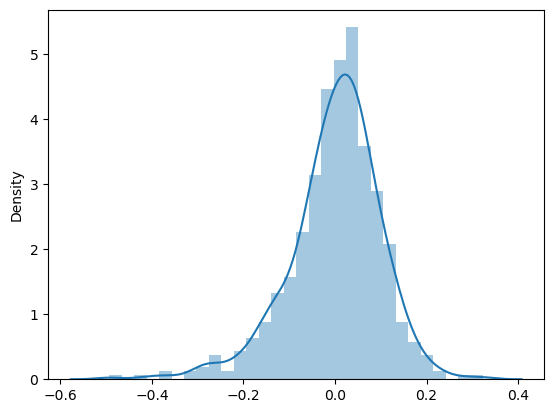

In [143]:
# computing the residuals (error in prediction) 

res = y_train - y_train_pred

# Checking the assumption : if the distribution of residual terms are centered around zero and is approximately normal 
sns.distplot(res)
plt.show()

                ### Assumption 1 : The error terms are normally distributed
                ### Assumption 2 : The mean of the error terms is roughly around zero

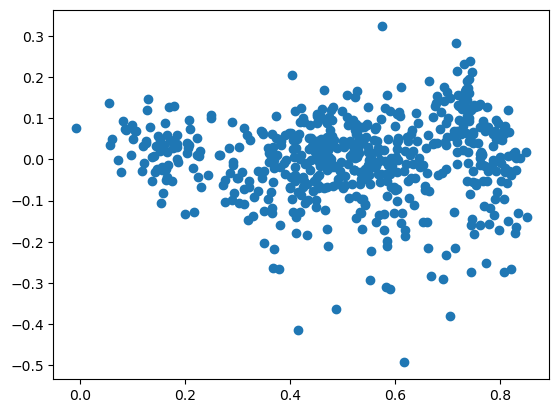

In [144]:
# Checking the assumption : If the residuals are randomly distributed 

plt.scatter(y_train_pred, res)


plt.show()

                    ### The residuals terms are randomly distributed

In [145]:
# Checking the assumption : The final model variables do not posses multicollinearity

vif = pd.DataFrame()

vif['variables'] = final_df.columns

vif['VIF'] = [variance_inflation_factor(final_df.values,i) for i in range (final_df.shape[1])]

vif['VIF'] = round(vif['VIF'],2)

vif = vif.sort_values(by = 'VIF' , ascending = False)

vif

variables   VIF
0        temp  4.15
1   windspeed  4.01
4        2019  2.08
2      Spring  1.68
3      Winter  1.49
6         Jul  1.36
5         Dec  1.21
7  Light Rain  1.06

                #### All the variables have VIF less that 5 so they do not possess multicollinearity

## Prediction on the Test Set

In [146]:
final_test.shape

(146, 29)

In [147]:
final_test.head()

cnt       temp      hum  windspeed  Spring  Summer  Winter  2019  Aug  \
444  6230  21.798347  82.1250   6.000406       0       1       0     1    0   
11   1162   7.081807  59.9545  20.410009       1       0       0     0    0   
69   1977  12.977402  64.9565  15.608990       1       0       0     0    0   
363  2999  12.778347  63.6667   9.000579       1       0       0     0    0   
6    1510   8.057402  49.8696  11.304642       1       0       0     0    0   

     Dec  ...  No-Holiday  Monday  Saturday  Sunday  Thursday  Tuesday  \
444    0  ...           0       0         0       0         0        0   
11     0  ...           0       0         0       0         0        0   
69     0  ...           0       0         0       0         0        0   
363    1  ...           0       0         0       0         0        0   
6      0  ...           0       0         0       0         0        0   

     Wednesday  Working-Yes  Light Rain  Misty  
444          1            1           0      1  
11           1            1           0      0  
69           0            1           0      1  
363          0            1           0      0  
6            0            1           0      1  

[5 rows x 29 columns]

In [148]:
final_test[numeric] = scaler.fit_transform(final_test[numeric])

In [149]:
final_test.head()

cnt      temp       hum  windspeed  Spring  Summer  Winter  2019  \
444  0.734977  0.586598  0.809371   0.138467       0       1       0     1   
11   0.084232  0.102729  0.526042   0.581843       1       0       0     0   
69   0.188880  0.296572  0.589965   0.434118       1       0       0     0   
363  0.320108  0.290027  0.573482   0.230781       1       0       0     0   
6    0.128916  0.134806  0.397162   0.301676       1       0       0     0   

     Aug  Dec  ...  No-Holiday  Monday  Saturday  Sunday  Thursday  Tuesday  \
444    0    0  ...           0       0         0       0         0        0   
11     0    0  ...           0       0         0       0         0        0   
69     0    0  ...           0       0         0       0         0        0   
363    0    1  ...           0       0         0       0         0        0   
6      0    0  ...           0       0         0       0         0        0   

     Wednesday  Working-Yes  Light Rain  Misty  
444          1            1           0      1  
11           1            1           0      0  
69           0            1           0      1  
363          0            1           0      0  
6            0            1           0      1  

[5 rows x 29 columns]

In [150]:
# making a list of the variables that appear in the final model 

var = ['temp','windspeed','Spring','Winter','2019','Dec','Jul','Light Rain','cnt']

In [151]:
pred_df = final_test[var]

In [152]:
final_df.head()

temp  windspeed  Spring  Winter  2019  Dec  Jul  Light Rain
252  0.748713   0.273132       0       0     0    0    0           0
659  0.533770   0.091072       0       1     1    0    0           0
563  0.914852   0.232326       0       0     1    0    1           0
404  0.256524   0.375185       1       0     1    0    0           0
407  0.085192   0.918338       1       0     1    0    0           0

In [153]:
pred_df.head()

temp  windspeed  Spring  Winter  2019  Dec  Jul  Light Rain       cnt
444  0.586598   0.138467       0       0     1    0    0           0  0.734977
11   0.102729   0.581843       1       0     0    0    0           0  0.084232
69   0.296572   0.434118       1       0     0    0    0           0  0.188880
363  0.290027   0.230781       1       0     0    1    0           0  0.320108
6    0.134806   0.301676       1       0     0    0    0           0  0.128916

In [154]:
y_test = pred_df.pop('cnt')

In [155]:
y_test.head()

444    0.734977
11     0.084232
69     0.188880
363    0.320108
6      0.128916
Name: cnt, dtype: float64

In [156]:
x_test = pred_df

In [157]:
x_test.head()

temp  windspeed  Spring  Winter  2019  Dec  Jul  Light Rain
444  0.586598   0.138467       0       0     1    0    0           0
11   0.102729   0.581843       1       0     0    0    0           0
69   0.296572   0.434118       1       0     0    0    0           0
363  0.290027   0.230781       1       0     0    1    0           0
6    0.134806   0.301676       1       0     0    0    0           0

In [158]:
x_test_sm = sm.add_constant(x_test)
x_test_sm

const      temp  windspeed  Spring  Winter  2019  Dec  Jul  Light Rain
444    1.0  0.586598   0.138467       0       0     1    0    0           0
11     1.0  0.102729   0.581843       1       0     0    0    0           0
69     1.0  0.296572   0.434118       1       0     0    0    0           0
363    1.0  0.290027   0.230781       1       0     0    1    0           0
6      1.0  0.134806   0.301676       1       0     0    0    0           0
..     ...       ...        ...     ...     ...   ...  ...  ...         ...
207    1.0  0.914624   0.332057       0       0     0    0    1           0
621    1.0  0.723649   0.167957       0       0     1    0    0           0
152    1.0  0.833741   0.556403       0       0     0    0    0           0
334    1.0  0.291150   0.407706       0       1     0    1    0           0
631    1.0  0.563007   0.247412       0       1     1    0    0           0

[146 rows x 9 columns]

In [159]:
x_test_sm.shape

(146, 9)

### Making the predictions of the test set using the model

In [160]:
y_test_pred = lr_model.predict(x_test_sm)

## Evaluation of the model based on the predicted and test data

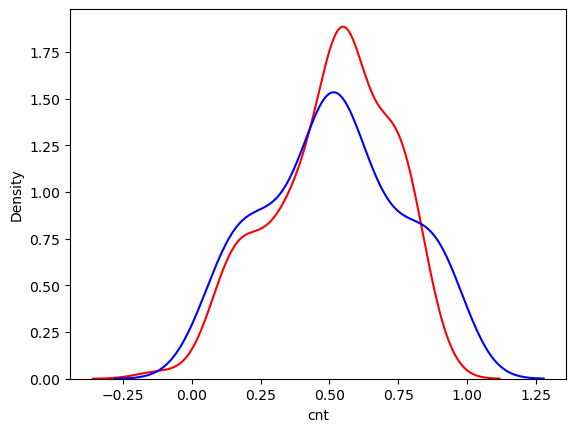

In [161]:
# creating the plot to measure the quality of prediction by the model  

sns.distplot(y_test_pred , color = 'red', hist = False)
sns.distplot(y_test, color = 'blue', hist= False)
plt.show()

In [162]:
from sklearn.metrics import r2_score

In [163]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 146 entries, 444 to 631
Series name: cnt
Non-Null Count  Dtype  
--------------  -----  
146 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [164]:
y_test_pred.info()

<class 'pandas.core.series.Series'>
Int64Index: 146 entries, 444 to 631
Series name: None
Non-Null Count  Dtype  
--------------  -----  
146 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


In [165]:
# computing the r2_score 

r2_score(y_true = y_test, y_pred = y_test_pred)

0.7987993723060255

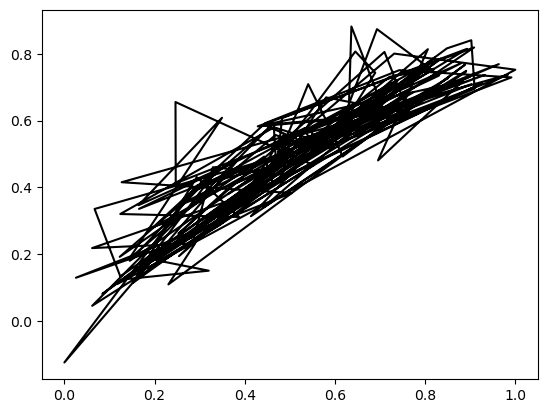

In [166]:
plt.plot(y_test, y_test_pred,color='k') 

plt.show()

        - The R squared value obtained in the training dataset : 0.79
        - The R squared value obtained in the test dataset : 0.79
        - The difference between the values lie within range of 5 percent i.e.0
        - Summary - The model is making good predictions based on R squared values

In [167]:
# computing the r2_score 

r2_score(y_train,y_train_pred)

0.7969404389339769

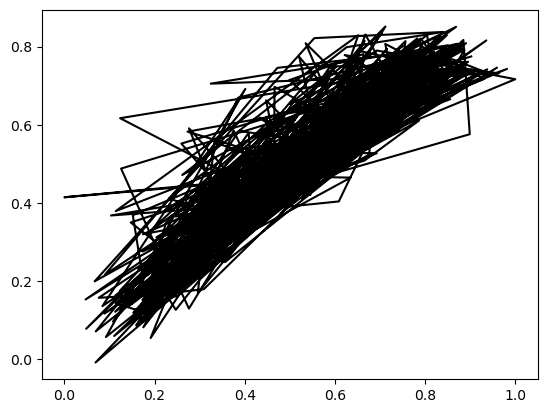

In [168]:
plt.plot(y_train, y_train_pred,color='k') 

plt.show()

# The Final Model

cnt = 0.2133 + 0.4641 x temp - 0.1013 x windspeed - 0.1212 x Spring + 0.0593 x Winter + 0.2372 x '2019' - 0.0528 x Dec - 0.0629 x Jul - 0.235 x Light Rain


# Final Model Summary

* Increase in temperature increases the demand of bikes 
* Increase in windspeed decreases the demand of bikes
* Demand of bikes decreases in Spring 
* Demand of bikes increases in Winter
* Demand of bikes increased in 2019 
* Demand of bikes decreases in Dec
* Demand of bikes increases in Jul
* Demand of bikes decreases when there is occurence of Light Rain